# Linear Regression sample problem

### *index*

* **The introduction of the Linear Regression Algorithm** : We are going to study Linear Regression, the most basic algorithm in Machine Learning.
* **How to implement Linear Regression with Scikit-Learn** : We will implement a Linear Regression with Scikit-Learn.
* **How to implement Linear Regression with Numpy** : We will implement a Linear Regression with Numpy.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## [ 1. The introduction of the Linear Regression Algorithm ]

Linear Regression is a way of Regression analysis which constructs linear correlations between a dependent variable(or Explanatory variables), y, and independent variables, X.

We will briefly understand Linear Regression through an example.

### Sample Data )
This example shows data of monthly incomes and  consumption.
In here, we will set the regression coefficient(or the weight) as 0.772(=w1) and 13.8(=w0).<br/>
After that, we will predict how much will be spent by a person who earns 280 per month.

In [2]:
# Generate example data
consume_df = pd.DataFrame([
    [100, 102],
    [200, 168],
    [300, 235],
    [400, 300],
    [500, 422]],
    columns=["incomes", "consumption"])

consume_df.index = ["Decile 1", "Decile 2", "Decile 3", "Decile 4", "Decile 5"]
consume_df

,incomes,consumption
Decile 1,100,102
Decile 2,200,168
Decile 3,300,235
Decile 4,400,300
Decile 5,500,422


In [3]:
# Apply a regression coefficient
X = np.array(consume_df['incomes'])
y = 0.772*X + 13.8    # y = w1*x + w0

In [4]:
X, y

(array([100, 200, 300, 400, 500], dtype=int64),
 array([ 91. , 168.2, 245.4, 322.6, 399.8]))

## [ 2. How to implement Linear Regression with Scikit-Learn ]

In this part, we are going to use Scikit-Learn to implement Linear Regression.

As the first step, we need to import packages which are required to implement them.

In [5]:
# LinearRegression package for implementing Linear Regression 
from sklearn.linear_model import LinearRegression

We will visualize the example data with Scikit-Learn.

In [6]:
# Change the shape of array X to send it to the fit method of Linear Regression class
sk_X = np.reshape(X, (-1, 1))

print(sk_X)
print(y)

[[100]
 [200]
 [300]
 [400]
 [500]]
[ 91.  168.2 245.4 322.6 399.8]


In [7]:
# Create LinearRegression instance
lin_reg = LinearRegression()

# Use fit method to train sk_X and y
lin_reg.fit(sk_X, y)

LinearRegression()

Calculate prediction values through the trained instance model.

In [8]:
lin_reg.predict(sk_X)

array([ 91. , 168.2, 245.4, 322.6, 399.8])

We can check the regression coefficient of LinearRegression instance by printing values of those attributes.

In [9]:
# coef_ : gradient, weight(w1)
# intercept_ : bias(w0)
lin_reg.coef_, lin_reg.intercept_ 

(array([0.772]), 13.799999999999926)

Check the set regression coefficient through the graph.

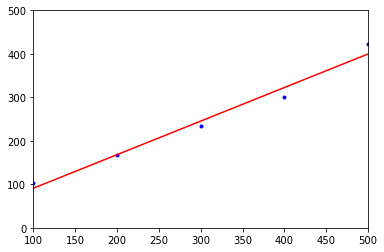

In [10]:
# Visualize comsumption per income as the shape of the blue dot.
plt.plot(consume_df['incomes'], consume_df["consumption"], 'b.')

# Visualize the regression coefficient as the shape of the red line.
plt.plot(sk_X, lin_reg.predict(sk_X), "r-")

plt.axis([100, 500, 0, 500])
plt.show()

Next, we will predict how much the person who earns 280 per month will spend as the monthly consumption.

In [11]:
# We can use the predict method of the LinearRegression instance to get a prediction value from the input data
lin_reg.predict([[280]])

array([229.96])

We will describe the predicted monthly consumption data on the visualized graph.

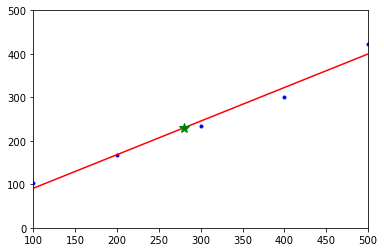

In [12]:
# Visualize comsumption per income as the shape of the blue dot.
plt.plot(consume_df['incomes'], consume_df["consumption"], 'b.')

# Visualize the regression coefficient as the shape of the red line.
plt.plot(sk_X, lin_reg.predict(sk_X), "r-")

# Visualize new data as the shape of the green star
plt.plot(280, lin_reg.predict([[280]]), 'g*', markersize = 10)

plt.axis([100, 500, 0, 500])
plt.show()

From now, without using a prepared Regression coefficient, <br/>
we will use the SGDRegressor class from Scikit-Learn to implement Gradient Descent 
to find the most accurate Regression coefficient.

However, a detailed explanation about Gradient Descent is in the **How to implement Linear Regression with Numpy** part below.

In [13]:
# SGDRegressor package for implementing Gradient Descent
from sklearn.linear_model import SGDRegressor

# We need to send the learning rate to the parameter 'eta0' when we generate the SGDRegressor instance.
sgd_reg = SGDRegressor(eta0=1e-6)

# Train the instance model with training data(sk_X) and label data(y)
sgd_reg.fit(sk_X, consume_df["consumption"])

D:\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDRegressor(eta0=1e-06)

Check predictions of the trained model.

In [14]:
sgd_reg.predict(sk_X)

array([ 80.99029475, 161.97650174, 242.96270874, 323.94891573,
       404.93512273])

Like we used attributes in the LinearRegression instance,<br/>
We can also use same instance attributes to check the regression coefficient that the SGDRegressor instance model has.

In [15]:
# coef_ : gradient, weight(w1)
# intercept_ : bias(w0)
sgd_reg.coef_, sgd_reg.intercept_  

(array([0.80986207]), array([0.00408775]))

Final step, visualize the gradient regression which we got from Gradient Descent.

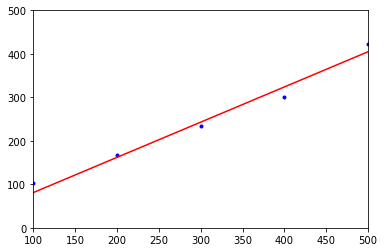

In [16]:
plt.plot(consume_df['incomes'], consume_df["consumption"], 'b.')
plt.plot(sk_X, sgd_reg.predict(sk_X)  , "r-")

plt.axis([100, 500, 0, 500])
plt.show()

We've found the optimal regression coefficient by progressing the Gradient Descent, <br/>
and successfully implemented the Linear Regression with Scikit-Learn.

## [ 3. How to implement Linear Regression with Numpy ]

Now we will use Numpy to implement Linear Regression.

Firstly, visualize the data that we made.

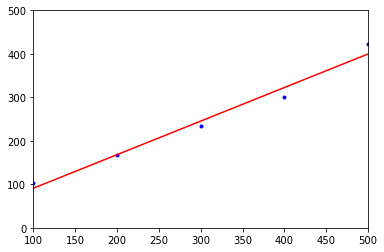

In [17]:
# Visualize consumption per income as the shape of the blue dot.
plt.plot(consume_df['incomes'], consume_df["consumption"], 'b.')

# Visualize the regression coefficient as the shape of the red line.
plt.plot(X, y, "r-")

plt.axis([100, 500, 0, 500])
plt.show()

Predict consumption with 280 income by the regression coefficient: y = 0.772x + 13.8

In [18]:
# Apply the regression coefficient to new data
new_X = 280
new_y = 0.772*new_X + 13.8

new_y

229.96

Visualize predicted data

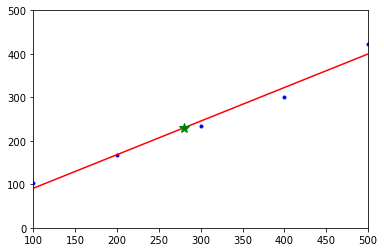

In [19]:
plt.plot(consume_df['incomes'], consume_df["consumption"], 'b.')
plt.plot(X, y, "r-")

# Visualize new data as the shape of the green star
plt.plot(new_X, new_y, 'g*', markersize = 10)

plt.axis([100, 500, 0, 500])
plt.show()

We could make a prediction of how much money will be used through a monthly income with the regression coefficient that we set.

An important point is that how we set regression coefficients will significantly affect to a prediction value that is caused by input values.<br/>
For that reason, it is essential to find the most suitable regression coefficient to make accurate predictions.

Then, What is the meaning of **finding the most suitable regression coefficient**?

It means **the regression coefficient which has the least amount of Loss**.<br/>
In here, Loss is **the difference between prediction values, which is from a regression coefficient, and actual values.**

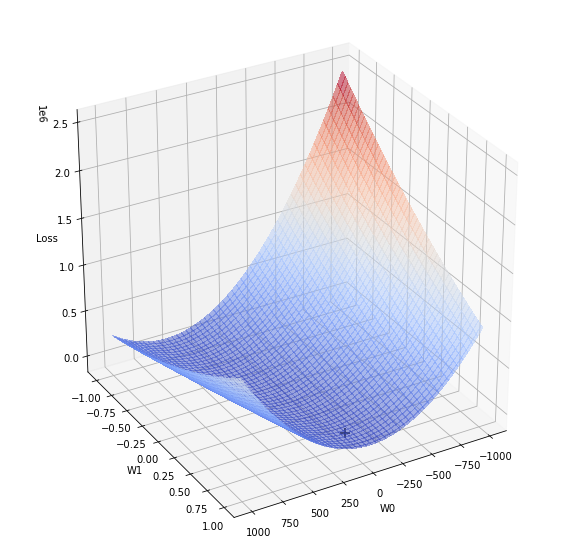

This graph describes loss values by changing regression coefficients. <br/>
If heights(axis y: Loss) are low by combinations of regression coefficients(axis x: W0, axis z: W1), it means they have low loss values.

The + mark in this graph is the regression coefficients which we used in the previous example, and we can figure out it has a small loss.<br/>

However, if we meet a situation that there is no given regression coefficient, how can we find the best regression coefficient?

This time, we will use the technic, **Gradient Descent to search for a regression coefficient which only makes a tiny loss value**.

## Gradient Descent

Gradient Descent is **an algorithm to find the regression coefficient that generates the smallest loss** in Linear Regression.

We **get a gradient based on a regression coefficient** and **repeat changing this regression coefficient to the direction to reduce the gradient**.

Since **another meaning of a big gradient value is a big loss**.<br/>
We can easily understand it through the next example image.

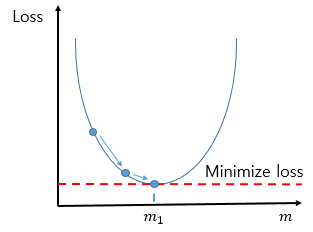

As we can see, the point which has the highest loss value also has the steepest gradient. On the other hand, other points which have smaller losses have gentle gradients.


Overall, decreasing the gradient value directly connects to 

This is a progressing order of Gradient Descent

1. get a gradient of the function
2. change values of regression coefficient to make the gradient lower
3. repeat these steps to minimize the loss value until the gradient leaches to the local extremum value.

Before we start, we will make functions for loss value calculations and differential calculations.

In [20]:
# Calculate a loss value
def calculate_MSE(W0, W1):
    x = consume_df.incomes # Independent variables,  incomes
    y_true = consume_df.consumption # Actual values

    y_pred = W1*x+W0 # Predictions through a regression coefficient
    return ((y_true - y_pred)**2).mean() # MSE

In [21]:
# Differential about W0
def calculate_wo_derivative(w0,w1):
    x = consume_df.incomes # Independent variables, incomes
    y_true = consume_df.consumption # Actual values
    return (w1*x + w0 - y_true).mean()

# Differential about W1
def calculate_w1_derivative(w0,w1):
    x = consume_df.incomes # Independent variables, incomes
    y_true = consume_df.consumption # Actual values
    return ((w1*x + w0 - y_true)*x).mean()

## Applying Gradient Descent

We are going to use Gradient Descent to the 2nd example data which you can easily find that it has a bigger loss value than the previous example. Then, we will find the most suitable regression coefficient.

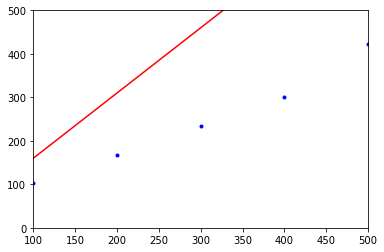

In [22]:
# We will use a different regression coefficient
w0 = 10
w1 = 1.5

sample_y = w1*X+w0

# visualize consumption per income data as the shape of the blue dot
plt.plot(consume_df['incomes'], consume_df["consumption"], 'b.')

# Visualize the regression coefficient as the shape of the red line 
plt.plot(X, sample_y, "r-")

plt.axis([100, 500, 0, 500])
plt.show()

This is the mathematical expression to move a gradient.

$$
W_{new} = W_{old} - \alpha * \frac{\partial loss}{\partial W} 
$$

Before we start the Gradient Descent algorithm, we must decide values for 2 options.

1. How much will you update a Gradient Descent model during each step? (Learning Rate)
2. how many times will you update the model? (Epoch)

### (1) Learning Rate
Firstly, we need to choose how much the regression coefficient will be updated within one step of training.
However, what we should be careful of is if the learning rate is too high or too low, the loss value might not properly decrease.

In [23]:
mse = calculate_MSE(w0,w1)  # Calculate the Loss value
dw0 = calculate_wo_derivative(w0,w1)  # Calculate the differential value based on w0
dw1 = calculate_w1_derivative(w0,w1)  # Calculate the differential value based on w1

dw0,dw1

(214.6, 78940.0)

In this example, dw1 has the too high gradient value.<br/>
if we give 0.001 of the learning rate, the Loss value will increase.

In [24]:
alpha = 0.001  # It means 0.001 of learning rate

new_w0 = w0 - alpha * dw0
new_w1 = w1 - alpha * dw1

new_w0, new_w1

(9.7854, -77.44)

In [25]:
new_mse = calculate_MSE(new_w0,new_w1)

print("The Loss value before the update : {:.3f}".format(mse))
print("The Loss value after the update  : {:.3f}".format(new_mse))

The Loss value before the update : 56899.400
The Loss value after the update  : 673071520.454


Nevertheless, if the learning rate is too low, the decrease of loss value will not show a significant change 
as it doesn't change a lot.

For this reason, setting an adequate learning rate is very important.

In [26]:
alpha = 1e-10  # It means 10^-10 of learning rate

new_w0 = w0 - alpha * dw0
new_w1 = w1 - alpha * dw1

new_w0, new_w1

(9.99999997854, 1.499992106)

In [27]:
new_mse = calculate_MSE(new_w0,new_w1)

print("The Loss value before the update : {:.3f}".format(mse))
print("The Loss value after the update  : {:.3f}".format(new_mse))

The Loss value before the update : 56899.400
The Loss value after the update  : 56898.154


We will set $10^{-6}$ for the learning rate

In [28]:
alpha = 1e-6  # It means 10^-6 of learning rate

new_w0 = w0 - alpha * dw0
new_w1 = w1 - alpha * dw1

new_w0, new_w1

(9.9997854, 1.42106)

After the proper learning rate is given, we can see a noticeable change of loss value.

In [29]:
new_mse = calculate_MSE(new_w0,new_w1)

print("The Loss value before the update : {:.3f}".format(mse))
print("The Loss value after the update  : {:.3f}".format(new_mse))

The Loss value before the update : 56899.400
The Loss value after the update  : 45121.738


### (2) Epoch

Epoch is the number of updates which is counted when the entire dataset is calculated.<br/>
This time, we will give 100 epochs.

In [30]:
# History lists to save updated weights and mse values.
w0_history = [w0]
w1_history = [w1]
mse_history = [mse]

alpha = 1e-6 # The learning rate
epoch = 100 # the value to decide how many times will train the model

for i in range(epoch):
    # Get the regression coefficient before update
    old_w0 = w0_history[-1]
    old_w1 = w1_history[-1]
    
    # Update differential values
    dw0 = calculate_wo_derivative(old_w0,old_w1)
    dw1 = calculate_w1_derivative(old_w0,old_w1)
    
    # Update the regression coefficient through Gradient Descent
    new_w0 = old_w0 - alpha * dw0
    new_w1 = old_w1 - alpha * dw1
    new_mse = calculate_MSE(new_w0,new_w1)

    # Save the result
    w0_history.append(new_w0)
    w1_history.append(new_w1)
    mse_history.append(new_mse)

## 3. Result check

We will describe changing loss values by changes of the regression coefficient.

We need to make data with history lists from the epoch part.

In [31]:
hist_df = pd.DataFrame({
    "W0":w0_history,
    "W1":w1_history,
    "Loss":mse_history
})

Visualize data of history lists.

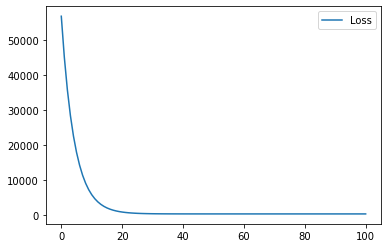

In [32]:
hist_df.plot(y='Loss')
plt.show()

We can check that the loss value constantly declines from the graph.

As the last step, we will check the regression coefficient that is resulted from the Gradient Descent,<br/>
and then, we will apply the regression coefficient to data and visualize it.

In [33]:
hist_df.sort_values('Loss').iloc[0]

W0        9.998112
W1        0.782375
Loss    249.188068
Name: 100, dtype: float64

We got 0.78 for W1 and 9.998 for W0

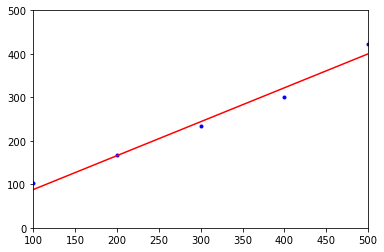

In [34]:
result_y = 0.78*X+9.998

# Visualize comsumption per income as the shape of the blue dot.
plt.plot(consume_df['incomes'], consume_df["consumption"], 'b.')

# Visualize the regression coefficient as the shape of the red line.
plt.plot(X, result_y, "r-")

plt.axis([100, 500, 0, 500])
plt.show()

Overall, we used weights that we got from Gradient Descent, and much accurate Linear Regression has accomplished than the 2nd example data.